# Assignment 1 - Linear Regression

Class: COMP 5630 - Machine Learning

Author: Chris Hinkson

Email: cmh0201@auburn.edu

In [7]:
'''
MODULE IMPORTS

This code cell will import any necessary modules.
'''

# System
import os

# Data
import numpy as np
import matplotlib.pyplot as plt

Attempting to load training and testing data from directory `../data/`!
-> Reshaped training X data to shape (100, 1)!
-> Reshaped training Y data to shape (100, 1)!
-> Reshaped testing X data to shape (100, 1)!
-> Reshaped testing Y data to shape (100, 1)!
Successfully loaded training and testing data from directory `../data/`!
-> Training data shape: X = (100, 1), Y = (100, 1)
-> Testing data shape: X = (100, 1), Y = (100, 1)


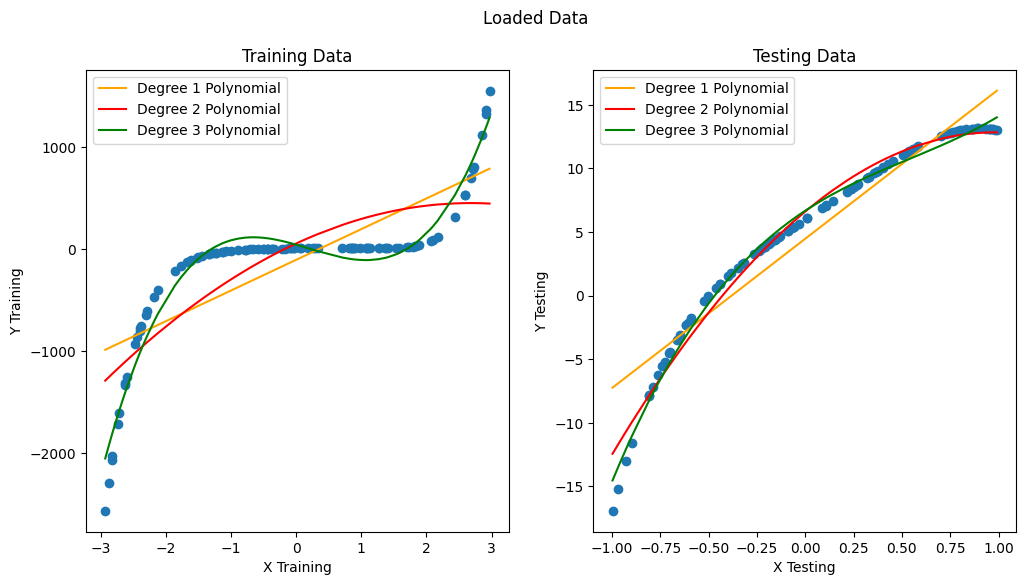

In [33]:
'''
DATA LOADER CLASS

This code cell will provide a DataLoader class to load provided numpy arrays for use in
the linear regression model. 
'''
class DataLoader:

	# Class Constructor
	def __init__(self, dataDirectoryPath: str="../data/", plotData: bool=False) -> None:

		# Save directory path
		self.dataDirectoryPath = dataDirectoryPath

		# Announce data load
		print(f"Attempting to load training and testing data from directory `{self.dataDirectoryPath}`!")

		# Define x_train path, check if it exists, load data if so, verify load, then reshape for model if necessary
		xTrainPath = os.path.join(self.dataDirectoryPath, "x_train.npy")
		if not os.path.exists(xTrainPath):
			raise FileNotFoundError(f"Attempted to load X-Train numpy array but could not find file `{xTrainPath}`!")
		self.trainingX = np.load(xTrainPath)
		if self.trainingX is None:
			raise Exception(f"Attempted to load X-Train numpy array but the array was not set!")
		if len(self.trainingX.shape) == 1:
			self.trainingX = self.trainingX.reshape(-1, 1)
			print(f"-> Reshaped training X data to shape {self.trainingX.shape}!")

		# Define y_train path, check if it exists, load data if so, verify load, then reshape for model if necessary
		yTrainPath = os.path.join(self.dataDirectoryPath, "y_train.npy")
		if not os.path.exists(yTrainPath):
			raise FileNotFoundError(f"Attempted to load Y-Train numpy array but could not find file `{yTrainPath}`!")
		self.trainingY = np.load(yTrainPath)
		if self.trainingY is None:
			raise Exception(f"Attempted to load Y-Train numpy array but the array was not set!")
		if len(self.trainingY.shape) == 1:
			self.trainingY = self.trainingY.reshape(-1, 1)
			print(f"-> Reshaped training Y data to shape {self.trainingY.shape}!")

		# Define x_test path, check if it exists, load data if so, verify load, then reshape for model if necessary 
		xTestPath = os.path.join(self.dataDirectoryPath, "x_test.npy")
		if not os.path.exists(xTestPath):
			raise FileNotFoundError(f"Attempted to load X-Test numpy array but could not find file `{xTestPath}`!")
		self.testingX = np.load(xTestPath)
		if self.testingX is None:
			raise Exception(f"Attempted to load X-Test numpy array but the array was not set!")
		if len(self.testingX.shape) == 1:
			self.testingX = self.testingX.reshape(-1, 1)
			print(f"-> Reshaped testing X data to shape {self.testingX.shape}!")

		# Define y_test path, check if it exists, load data if so, verify load, then reshape for model if necessary
		yTestPath = os.path.join(self.dataDirectoryPath, "y_test.npy")
		if not os.path.exists(yTestPath):
			raise FileNotFoundError(f"Attempted to load Y-Test numpy array but could not find file `{yTestPath}`!")
		self.testingY = np.load(yTestPath)
		if self.testingY is None:
			raise Exception(f"Attempted to load Y-Test numpy array but the array was not set!")
		if len(self.testingY.shape) == 1:
			self.testingY = self.testingY.reshape(-1, 1)
			print(f"-> Reshaped testing Y data to shape {self.testingY.shape}!")

		# Print data load information
		print(f"Successfully loaded training and testing data from directory `{self.dataDirectoryPath}`!")
		print(f"-> Training data shape: X = {self.trainingX.shape}, Y = {self.trainingY.shape}")
		print(f"-> Testing data shape: X = {self.testingX.shape}, Y = {self.testingY.shape}")

		# Create class figure and axes incase if want to plot data
		if plotData:

			# Configure plot figure
			self._createPlotFigure()

			# Create plots
			self.plotTrainingData()
			self.plotTestingData()

		else:
			# If we aren't going to have plots yet, set values to None
			self.fig, (self.ax1, self.ax2) = None, (None, None)

	# Create class figure and axes
	def _createPlotFigure(self) -> None:
		self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize=(12, 6))
		self.fig.suptitle("Loaded Data")
		self.fig.canvas.draw()

	# Plot training data
	def plotTrainingData(self) -> None:

		# Check if figure and axes exist, create if not
		if not self.fig:
			self._createPlotFigure()

		# Configure plot figure
		self.ax1.set_title("Training Data")
		self.ax1.set_xlabel("X Training")
		self.ax1.set_ylabel("Y Training")

		# Get data back as 1D vector for plotting
		trainingXvector = self.trainingX.flatten()
		trainingYvector = self.trainingY.flatten()

		# Plot training data
		self.ax1.scatter(trainingXvector, trainingYvector)

		# Plot best-fit lines (using method described at https://stackoverflow.com/a/31800660)
		self.ax1.plot(np.unique(trainingXvector), np.poly1d(np.polyfit(trainingXvector, trainingYvector, 1))(np.unique(trainingXvector)), color='orange', label='Degree 1 Polynomial')
		self.ax1.plot(np.unique(trainingXvector), np.poly1d(np.polyfit(trainingXvector, trainingYvector, 2))(np.unique(trainingXvector)), color='red', label='Degree 2 Polynomial')
		self.ax1.plot(np.unique(trainingXvector), np.poly1d(np.polyfit(trainingXvector, trainingYvector, 3))(np.unique(trainingXvector)), color='green', label='Degree 3 Polynomial')

		# Show plot
		self.ax1.legend()
		self.fig.canvas.draw()

	# Plot testing data
	def plotTestingData(self) -> None:

		# Check if figure and axes exist, create if not
		if not self.fig:
			self._createPlotFigure()

		# Configure plot figure
		self.ax2.set_title("Testing Data")
		self.ax2.set_xlabel("X Testing")
		self.ax2.set_ylabel("Y Testing")

		# Get data back as 1D vector for plotting
		testXvector = self.testingX.flatten()
		testYvector = self.testingY.flatten()

		# Plot testing data
		self.ax2.scatter(testXvector, testYvector)

		# Plot best-fit lines (using method described at https://stackoverflow.com/a/31800660)
		self.ax2.plot(np.unique(testXvector), np.poly1d(np.polyfit(testXvector, testYvector, 1))(np.unique(testXvector)), color='orange', label='Degree 1 Polynomial')
		self.ax2.plot(np.unique(testXvector), np.poly1d(np.polyfit(testXvector, testYvector, 2))(np.unique(testXvector)), color='red', label='Degree 2 Polynomial')
		self.ax2.plot(np.unique(testXvector), np.poly1d(np.polyfit(testXvector, testYvector, 3))(np.unique(testXvector)), color='green', label='Degree 3 Polynomial')

		# Show plot
		self.ax2.legend()
		self.fig.canvas.draw()

Task1DataLoader = DataLoader(dataDirectoryPath="../data/", plotData=True)

In [30]:
'''
LINEAR REGRESSION CLASS

This code cell will provide a LinearRegression class to perform linear regression on a given dataset.
'''
class LinearRegression:

	# Class Constructor
	def __init__(self, learningRate: float=0.01, numIterations: int=1000) -> None:

		# Initialize instance variables
		self.learningRate = learningRate
		self.numIterations = numIterations
		self.weights = None
		self.bias = None

	# Train the model on a given dataset 
	def trainModel(self, trainingX: np.ndarray, trainingY: np.ndarray) -> None:
		
		# Verify training data is valid
		print(f"Size of trainingX: {trainingX.shape}")
		print(f"Size of trainingY: {trainingY.shape}")

		print(f"X: {trainingX[:5]}")
		print(f"Y: {trainingY[:5]}")

		# If weights have not been initialized, set them all to zero
		if self.weights is None:
			self.weights = np.zeros(trainingX.shape[1])
			self.bias = 0

		# Perform gradient descent for the specified number of iterations
		for i in range(self.numIterations):

			# Calculate the predictions, which is X * weights
			print(f"Size of weights: {self.weights.shape}")
			print(f"Size of trainingX: {trainingX.shape}")
			predictionsY = np.dot(trainingX, self.weights) + self.bias
			print(f"Size of predictionsY: {predictionsY.shape}")


			# dw = (1 / trainingX.shape[0]) * np.dot(trainingX.T, (predictionsY - trainingY))
			# db = (1 / trainingX.shape[0]) * np.sum(predictionsY - trainingY)
			# self.weights -= self.learningRate * dw
			# self.bias -= self.learningRate * db

testLinearRegression = LinearRegression(learningRate=0.01, numIterations=1)
testLinearRegression.trainModel(Task1DataLoader.trainingX, Task1DataLoader.trainingY)


Size of trainingX: (100,)
Size of trainingY: (100,)
X: [ 2.91868393  2.90791482 -0.08495122 -0.50477522  1.79352362]
Y: [ 1.35839541e+03  1.31962297e+03  5.14761884e+00 -8.99414045e-02
  2.39302944e+01]


IndexError: tuple index out of range